# Làm mịn hình ảnh

## Mục tiêu
Trong hướng dẫn này, bạn sẽ học cách áp dụng nhiều bộ lọc tuyến tính khác nhau để làm mịn hình ảnh bằng cách sử dụng các hàm OpenCV như:

- `blur()`
- `GaussianBlur()`
- `medianBlur()`
- `bilateralFilter()`

## Lý thuyết

- Làm mịn, còn được gọi là làm mờ, là một thao tác xử lý hình ảnh đơn giản và thường được sử dụng.

- Có nhiều lý do để làm mịn. Trong hướng dẫn này, chúng ta sẽ tập trung vào việc làm mịn để giảm nhiễu (các cách sử dụng khác sẽ được trình bày trong các hướng dẫn sau).

- Để thực hiện thao tác làm mịn, chúng ta sẽ áp dụng bộ lọc cho hình ảnh của mình. Loại bộ lọc phổ biến nhất là bộ lọc tuyến tính, trong đó giá trị của pixel đầu ra (tức là $g(i,j)$
) được xác định là tổng có trọng số của các giá trị pixel đầu vào (tức là $f(i+k, j+l)$):  

$$ g(i, j) = \sum_{k,l}{f(i+k,j+l)h(k,l)} $$

$h(k,l)$ được gọi là hạt nhân, thực chất chỉ là các hệ số của bộ lọc.
Nó giúp hình dung bộ lọc như một cửa sổ hệ số trượt trên hình ảnh.

- Có nhiều loại bộ lọc, ở đây chúng tôi sẽ đề cập đến những loại được sử dụng nhiều nhất:

### Bộ lọc hộp chuẩn hóa - Normalized Box Filter


- Bộ lọc này là đơn giản nhất trong tất cả! Mỗi pixel đầu ra là giá trị trung bình của các hạt nhân lân cận của nó (tất cả đều đóng góp với trọng số bằng nhau)
- Hạt nhân như sau:
$$
K = \frac{1}{K_{width} \times K_{height}}

\begin{bmatrix}
1 & 1 & 1 & ... & 1 \\
1 & 1 & 1 & ... & 1 \\
. & . & . & ... & . \\
. & . & . & ... & . \\
1 & 1 & 1 & ... & 1
\end{bmatrix}
$$

OpenCV cung cấp hàm `blur()` để thực hiện làm mịn bằng bộ lọc này. Chúng tôi chỉ định 4 đối số (chi tiết hơn, hãy kiểm tra Tài liệu tham khảo):
- `src`: Ảnh nguồn
- `dst`: Ảnh đích
- `Size(w, h)`: Xác định kích thước của hạt nhân sẽ được sử dụng (chiều rộng w pixel và chiều cao h pixel)
- `Point(-1, -1)`: Chỉ ra vị trí của điểm neo (điểm ảnh được đánh giá) so với vùng lân cận. Nếu có giá trị âm, thì tâm của hạt nhân được coi là điểm neo.

### Bộ lọc Gaussian


- Có lẽ là bộ lọc hữu ích nhất (mặc dù không phải là bộ lọc nhanh nhất). Lọc Gauss được thực hiện bằng cách tích chập từng điểm trong mảng đầu vào với một hạt nhân Gauss và sau đó cộng tất cả chúng lại để tạo ra mảng đầu ra.
- Chỉ để làm cho hình ảnh rõ ràng hơn, hãy nhớ hạt nhân Gauss 1D trông như thế nào?

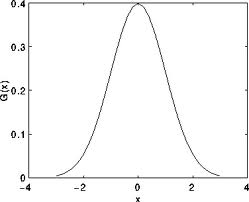

- Giả sử một hình ảnh là 1D, bạn có thể nhận thấy rằng pixel nằm ở giữa sẽ có trọng số lớn nhất. Trọng số của các pixel lân cận giảm khi khoảng cách không gian giữa chúng và pixel trung tâm tăng lên.

> Hãy nhớ rằng một Gaussian 2D có thể được biểu diễn như sau:
> $$
G_0(x, y) = Ae^{\frac{-(x-\mu _x)^2}{2\sigma _x^2} + \frac{-(y-\mu _y)^2}{2\sigma _y^2}}
> $$
> Trong đó $\mu$ là kỳ vọng và $\sigma ^2$ là phương sai

Nó được thực hiện bởi hàm `GaussianBlur()`: Ở đây chúng ta sử dụng 4 đối số (chi tiết hơn, hãy kiểm tra tham chiếu OpenCV):
- `src`: Ảnh nguồn
- `dst`: Ảnh đích
- `Size(w, h)`: Kích thước của hạt nhân được sử dụng (các hàng xóm cần được xem xét). $w$ và $h$ phải là số lẻ và số dương nếu không kích thước sẽ được tính toán bằng cách sử dụng tham số $\sigma _x$ và $\sigma _y$
- $\sigma _x$: Độ lệch chuẩn trong x. Nếu bằng 0 ngụ ý rằng $\sigma _x$ được tính bằng cách sử dụng kích thước hạt nhân.
- $\sigma _y$: Độ lệch chuẩn trong y. Nếu bằng 0 ngụ ý rằng $\sigma _y$ được tính bằng cách sử dụng kích thước hạt nhân.


### Bộ lọc trung vị - Median Filter

- Bộ lọc trung vị chạy qua từng phần tử của tín hiệu (trong trường hợp này là hình ảnh) và thay thế mỗi điểm ảnh bằng trung vị của các điểm ảnh lân cận (nằm trong vùng lân cận hình vuông xung quanh điểm ảnh được đánh giá).

Bộ lọc này được cung cấp bởi hàm `medianBlur()`: Chúng tôi sử dụng ba đối số:
- `src`: Ảnh nguồn
- `dst`: Ảnh đích, phải cùng loại với src
- `i`: Kích thước của hạt nhân (chỉ có một vì chúng tôi sử dụng cửa sổ hình vuông). Phải là số lẻ.

### Bộ lọc song phương - Bilateral Filter

- Cho đến nay, chúng tôi đã giải thích một số bộ lọc có mục tiêu chính là làm mịn hình ảnh đầu vào. Tuy nhiên, đôi khi các bộ lọc không chỉ làm tan nhiễu mà còn làm mịn các cạnh. Để tránh điều này (ít nhất là ở một mức độ nào đó), chúng ta có thể sử dụng bộ lọc song phương.
- Tương tự như bộ lọc Gaussian, bộ lọc song phương cũng xem xét các pixel lân cận với trọng số được gán cho từng pixel. Các trọng số này có hai thành phần, thành phần đầu tiên là cùng trọng số được bộ lọc Gaussian sử dụng. Thành phần thứ hai tính đến sự khác biệt về cường độ giữa các pixel lân cận và pixel được đánh giá.
- Để biết giải thích chi tiết hơn, bạn có thể kiểm tra [liên kết này](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

Được cung cấp bởi hàm `bilateralFilter()` Chúng tôi sử dụng 5 đối số:
- `src`: Ảnh nguồn
- `dst`: Ảnh đích
- `d`: Đường kính của mỗi vùng lân cận pixel.
- $\sigma _{Color}$: Độ lệch chuẩn trong không gian màu.
- $\sigma _{Space}$: Độ lệch chuẩn trong không gian tọa độ (theo pixel)

## Code
Chương trình này làm gì?
- Tải hình ảnh
- Áp dụng 4 loại bộ lọc khác nhau (được giải thích trong Lý thuyết) và hiển thị các hình ảnh đã lọc theo trình tự

In [17]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

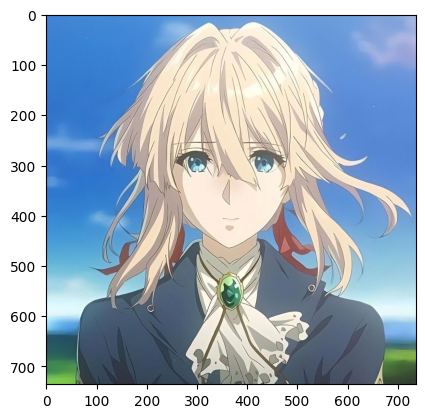

In [18]:
KERNEL_SIZE = 31

# Đọc ảnh
image_brg = cv2.imread("images/violet.jpg", cv2.IMREAD_COLOR)
src = cv2.cvtColor(image_brg, cv2.COLOR_BGR2RGB)
plt.imshow(src)

In [22]:
'Original Image'
# 'Homogeneous Blur'
dst_homo = cv2.blur(src, (KERNEL_SIZE, KERNEL_SIZE))

# 'Gaussian Blur'
dst_gau  = cv2.GaussianBlur(src, (KERNEL_SIZE, KERNEL_SIZE), 0)

# 'Median Blur'
dst_med  = cv2.medianBlur(src, KERNEL_SIZE)

# 'Bilateral Blur'
dst_bila = cv2.bilateralFilter(src, d=2, sigmaColor=0, sigmaSpace=0)

Text(0.5, 1.0, 'Bilateral Blur')

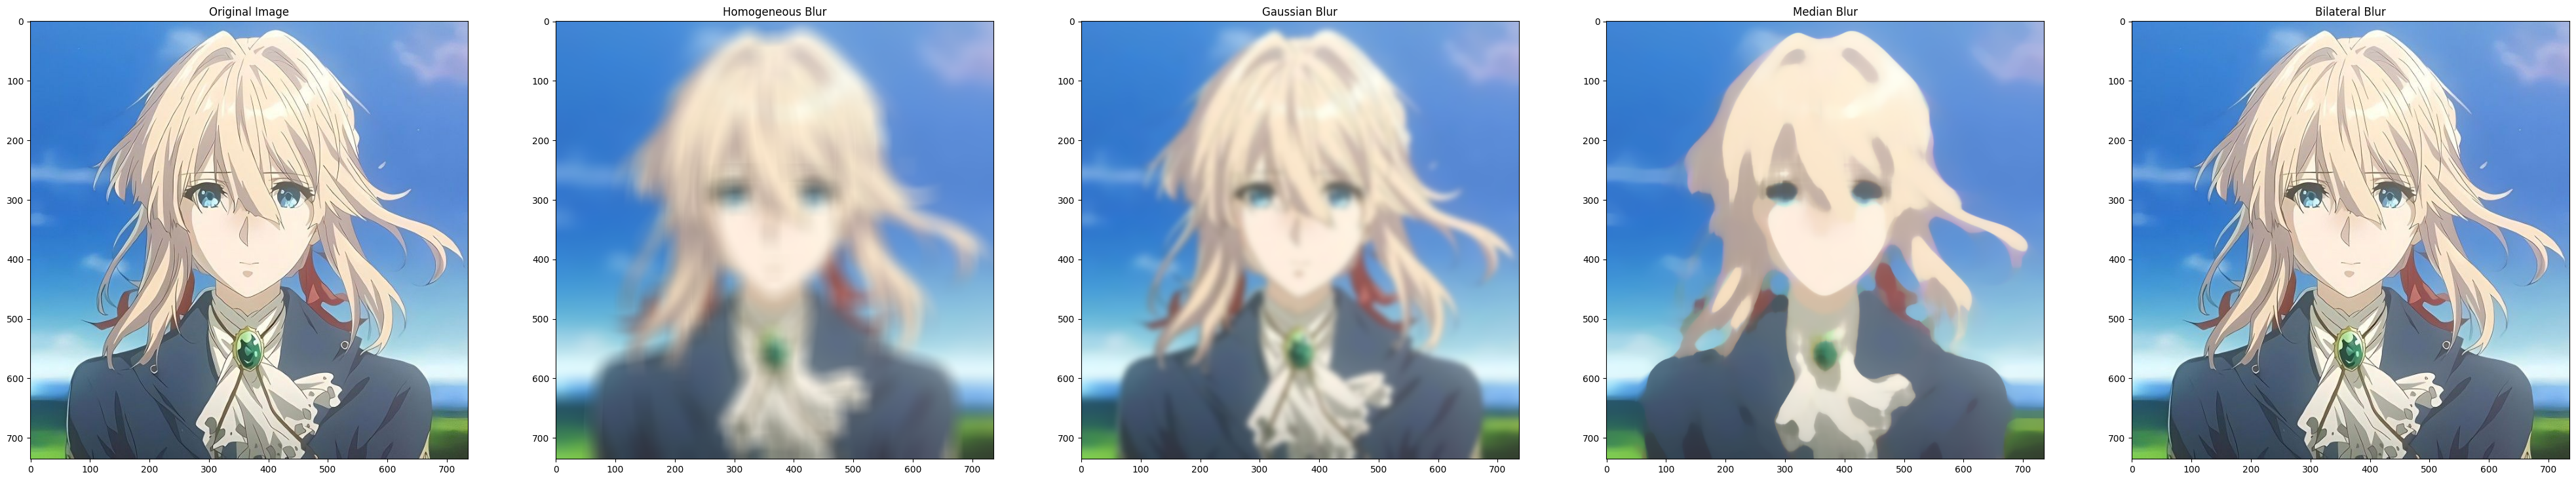

In [23]:
plt.figure(figsize=[50, 10])
plt.subplot(151); plt.imshow(src);      plt.title('Original Image')
plt.subplot(152); plt.imshow(dst_homo); plt.title('Homogeneous Blur')
plt.subplot(153); plt.imshow(dst_gau);  plt.title('Gaussian Blur')
plt.subplot(154); plt.imshow(dst_med);  plt.title('Median Blur')
plt.subplot(155); plt.imshow(dst_bila); plt.title('Bilateral Blur')


## Giải thích
Hãy kiểm tra các hàm OpenCV chỉ liên quan đến quy trình làm mịn, vì phần còn lại đã được biết đến.
